<a href="https://colab.research.google.com/github/vaishnavikamak04/customer-churn-nm/blob/main/customer_churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
import zipfile
import oss

# Unzip the uploaded file
with zipfile.ZipFile("/content/Churn-XG,Random.zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")  # extracts to folder 'unzipped_data'

# Check the extracted files
os.listdir("unzipped_data")


['Churn-XG,Random']

In [ ]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("/content/streaming-subscription-churn-model.zip", 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")  # extracts to folder 'unzipped_data'

# Check the extracted files
os.listdir("unzipped_data")


['train.csv', 'sample_submission.csv', 'Churn-XG,Random', 'test.csv']

In [ ]:
# Optional: See all columns when displaying dataframes
pd.set_option('display.max_columns', None)

# 📥 2. Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 🕵️ 3. First glance at the dataset
print(train_df.shape)
train_df.head()


(125000, 20)


,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


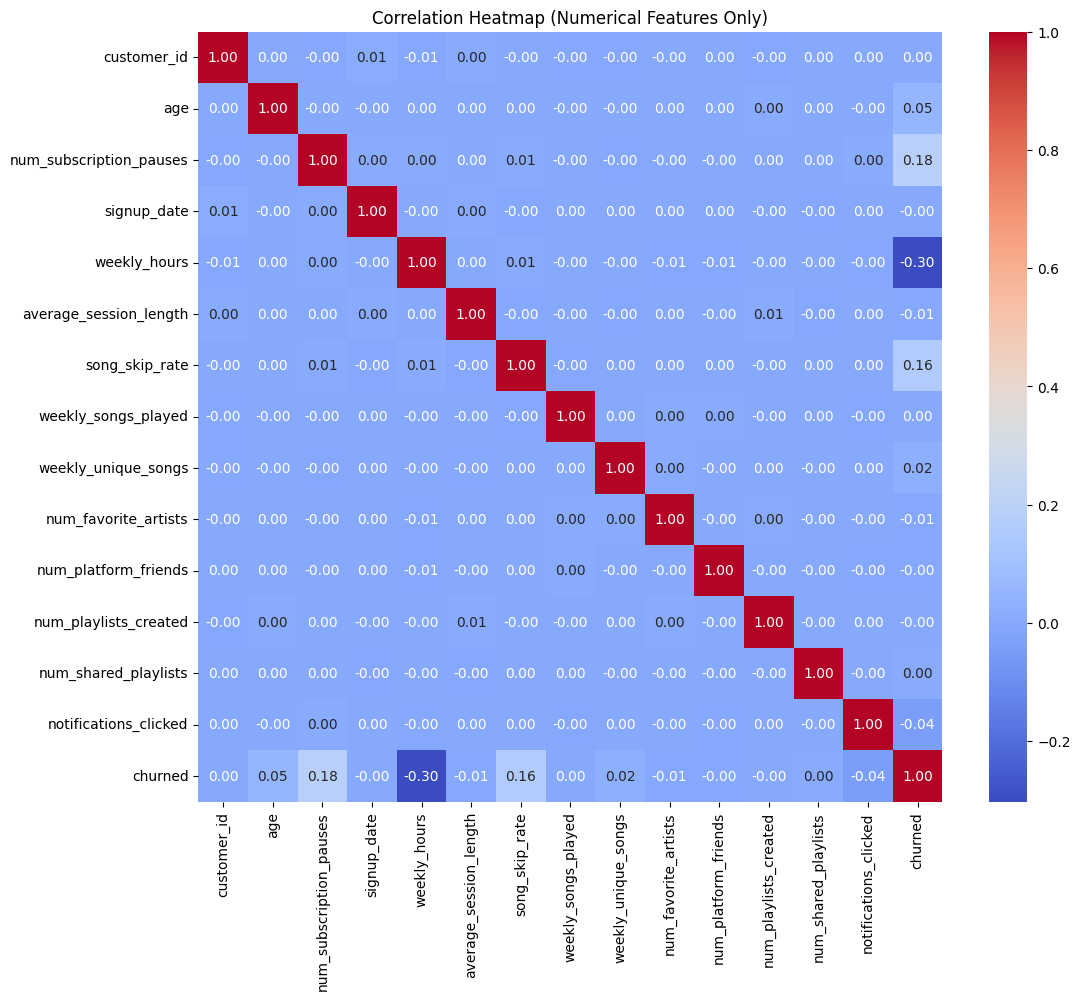

In [ ]:
# Select only numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix only on numerical data
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()



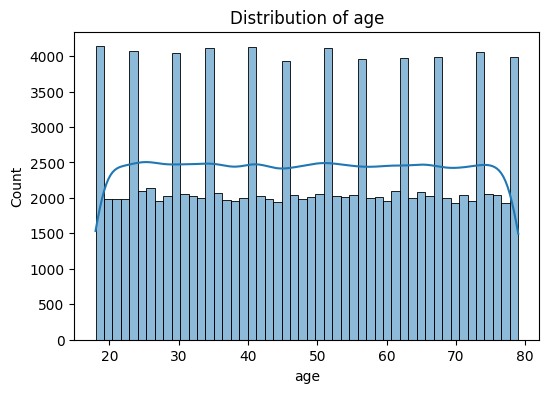

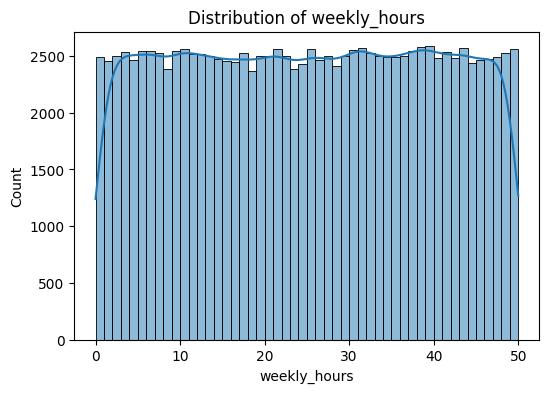

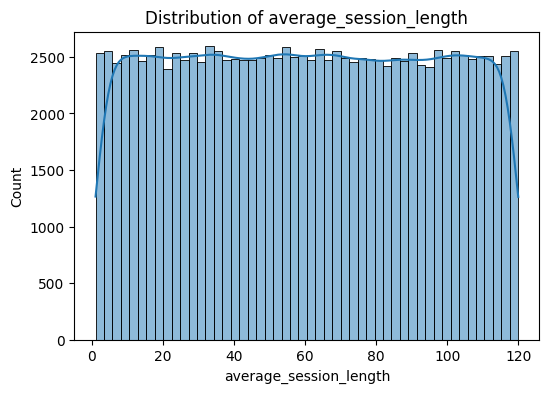

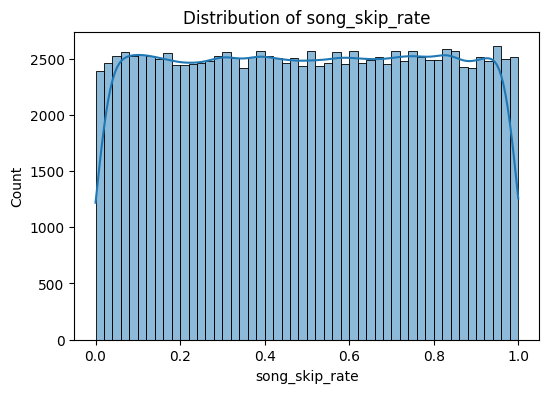

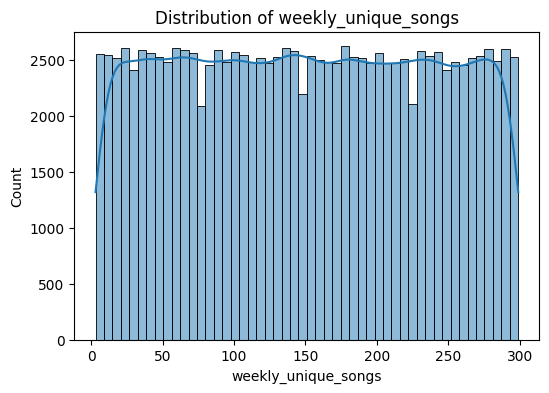

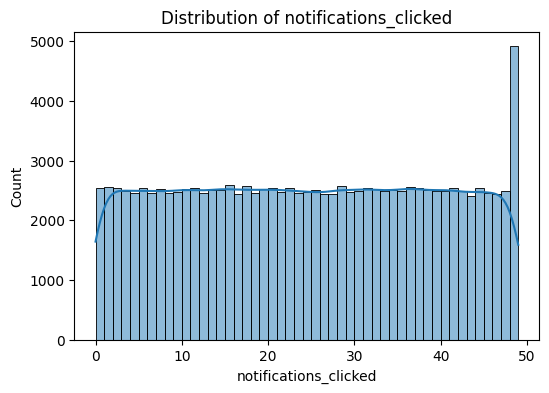

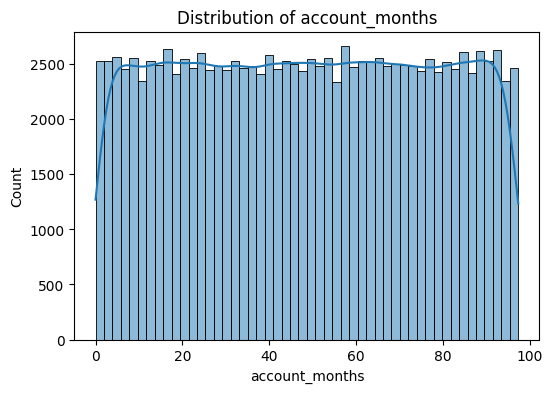

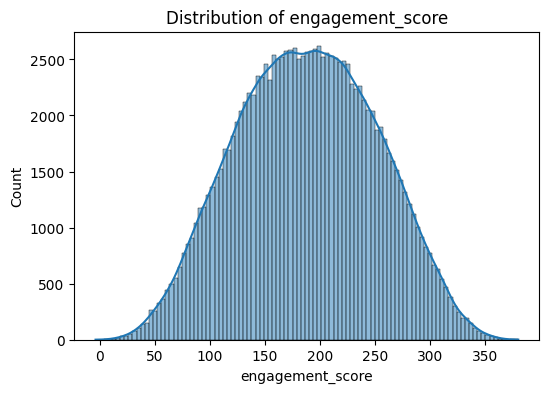

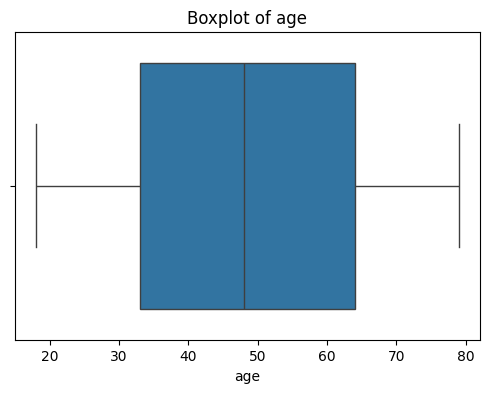

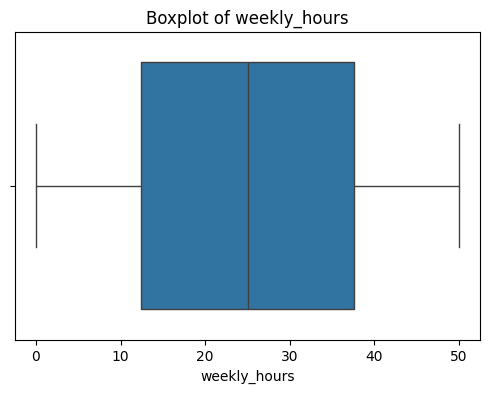

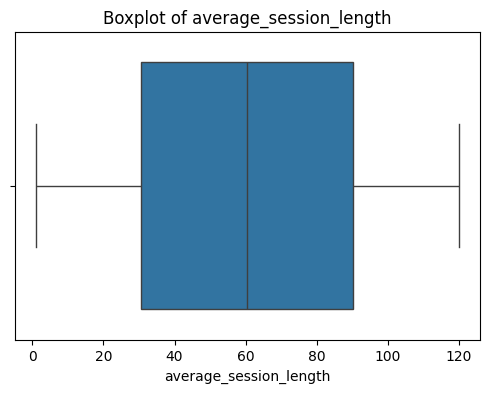

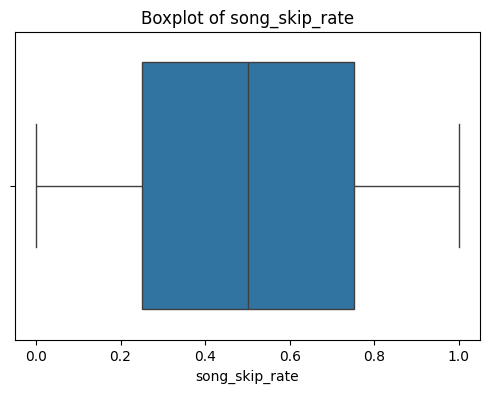

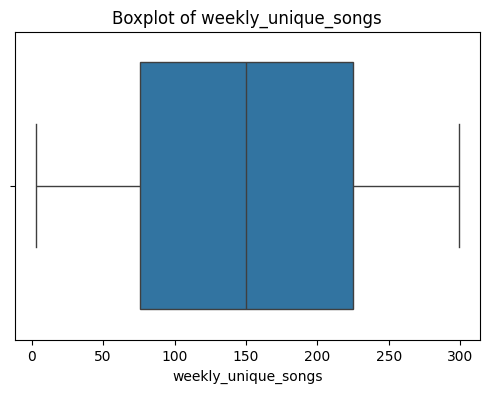

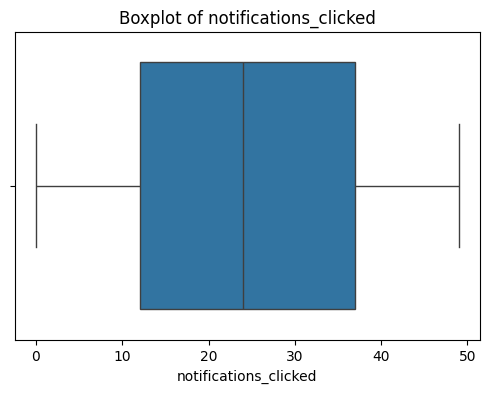

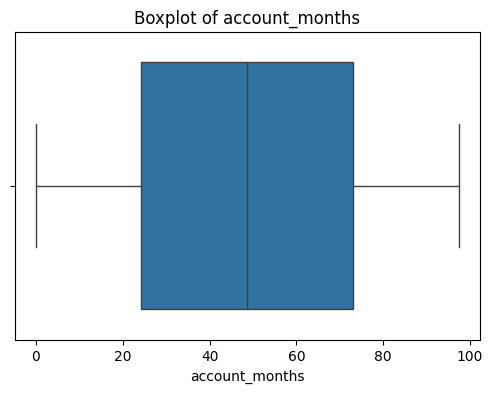

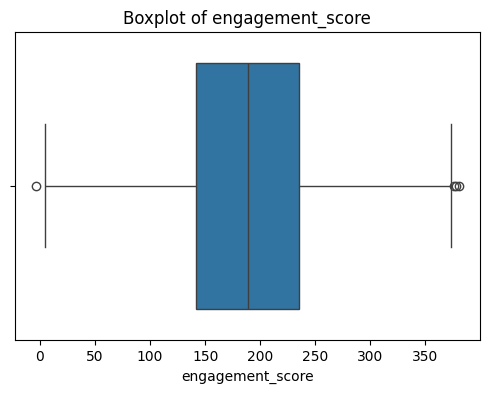

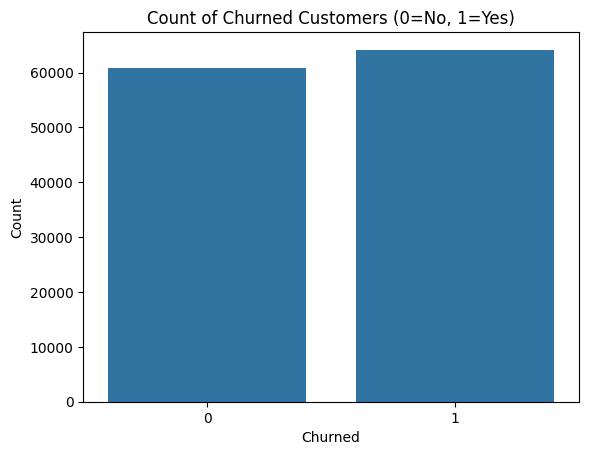

In [ ]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Load the dataset (adjust path if needed)
train_df = pd.read_csv('/content/preprocessed_train.csv')  # replace with your actual file path if different

# ✅ Display first few rows to understand structure
train_df.head()

#Univariate analysis

# 🎨 Plotting histograms with KDE for each numerical column to see data distribution
num_cols = ['age', 'weekly_hours', 'average_session_length', 'song_skip_rate',
            'weekly_unique_songs', 'notifications_clicked', 'account_months',
            'engagement_score']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
# 📊 Boxplots help in spotting outliers in numerical data
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
# 📊 Countplot to check class distribution of target variable 'churned'
sns.countplot(x='churned', data=train_df)
plt.title('Count of Churned Customers (0=No, 1=Yes)')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()


<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


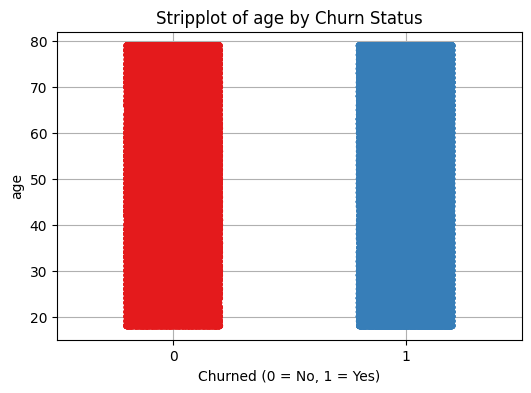

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


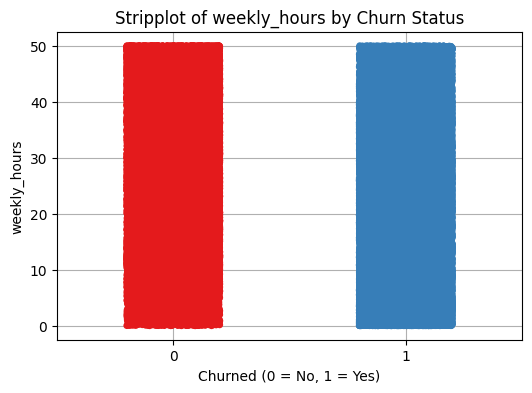

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


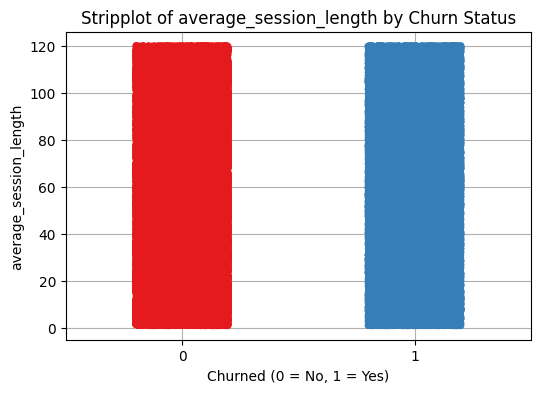

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


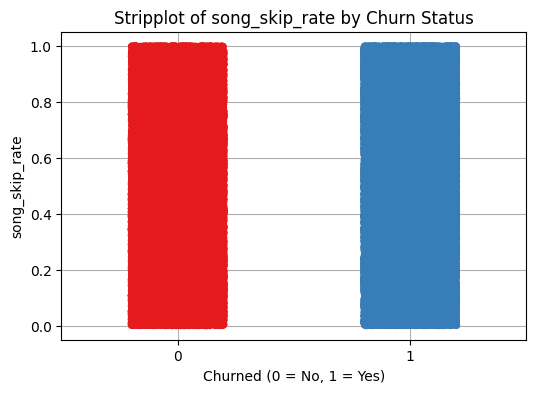

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


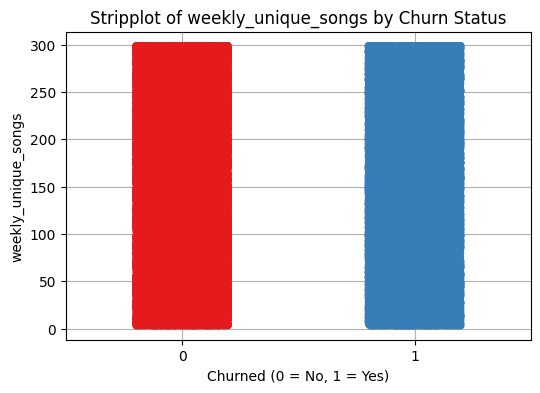

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


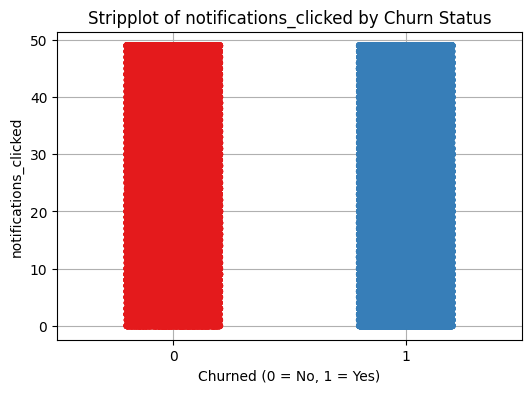

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


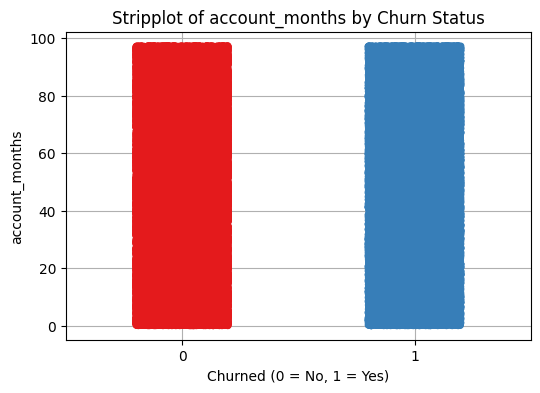

<ipython-input-30-b1e802f892a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')


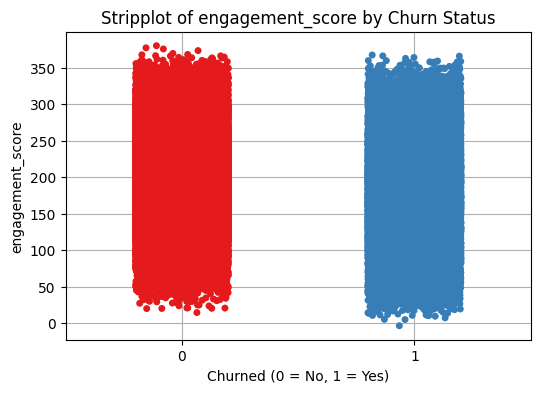

In [ ]:
# Stripplots with jitter for clear individual points visualization
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.stripplot(x='churned', y=col, data=df, jitter=0.2, palette='Set1')
    plt.title(f'Stripplot of {col} by Churn Status')
    plt.xlabel('Churned (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


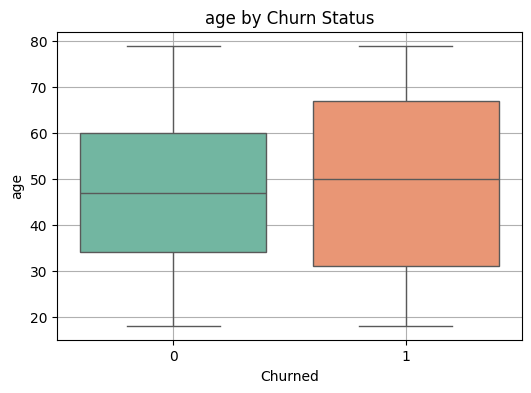

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


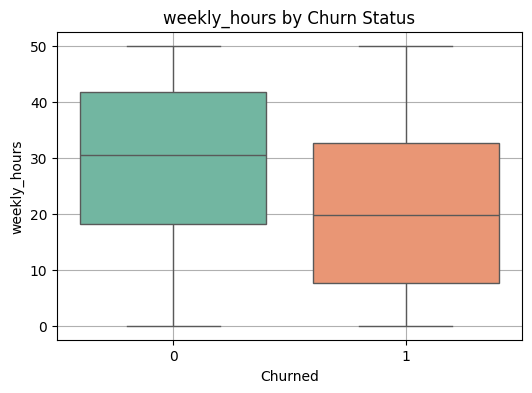

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


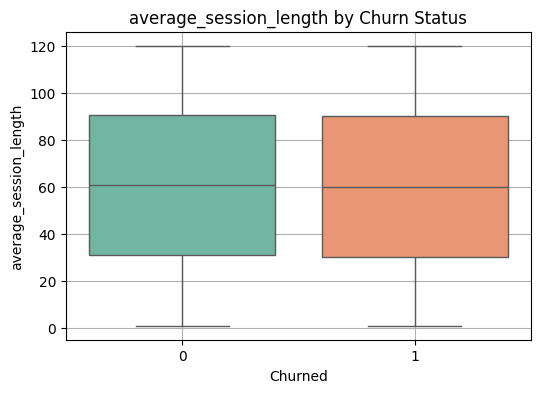

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


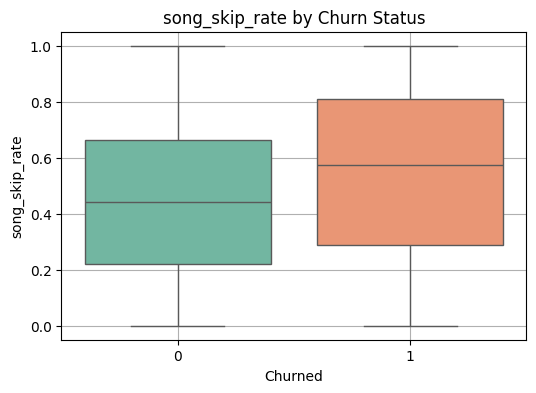

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


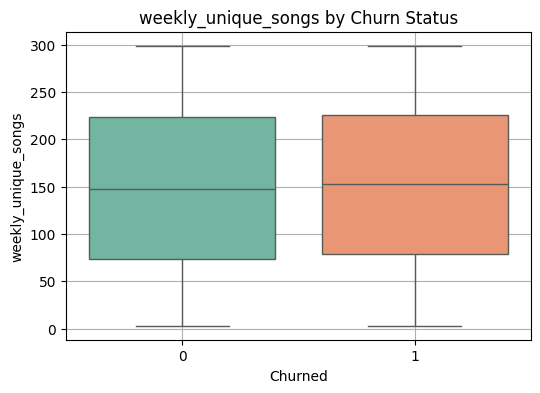

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


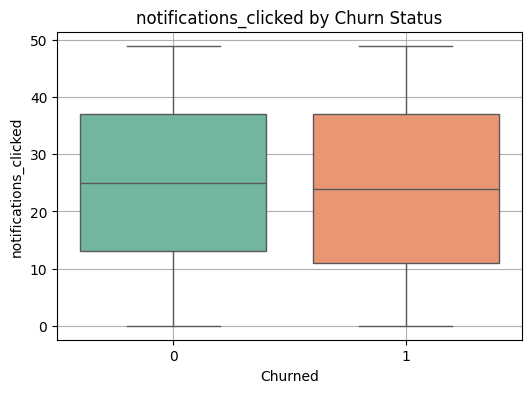

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


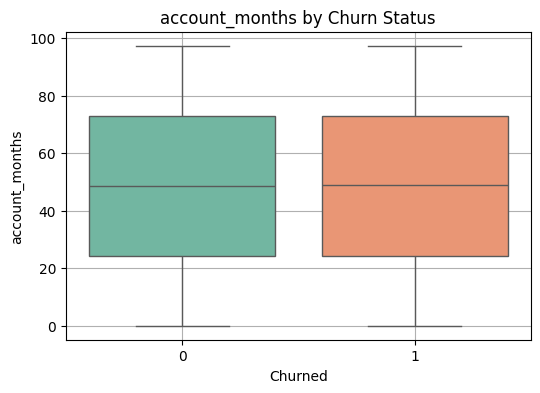

<ipython-input-31-d8ec645b66f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churned', y=col, data=df, palette='Set2')


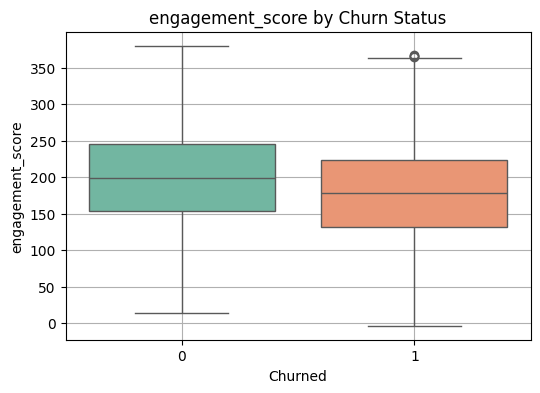

In [ ]:
#bivariate analysis
# Compare numerical feature distributions between churned and non-churned
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churned', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Churn Status')
    plt.xlabel('Churned')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


In [ ]:
df.columns

Index(['customer_id', 'age', 'location', 'subscription_type', 'payment_plan',
       'num_subscription_pauses', 'payment_method',
       'customer_service_inquiries', 'signup_date', 'weekly_hours',
       'average_session_length', 'song_skip_rate', 'weekly_songs_played',
       'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned', 'account_months',
       'engagement_score'],
      dtype='object')

<ipython-input-34-2c20fb9a4347>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churned', data=df, palette='pastel')


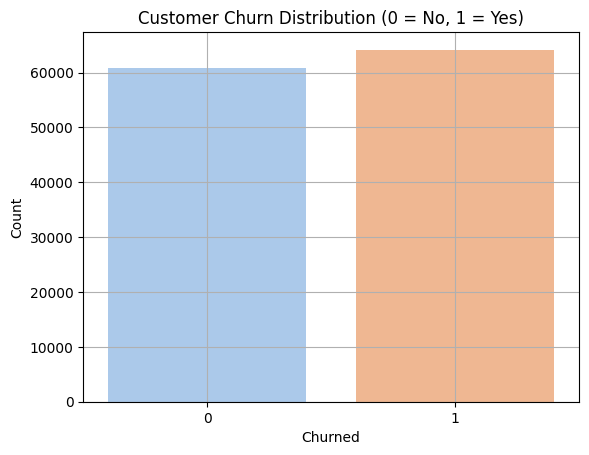

In [ ]:
# Visualizing churned vs non-churned customer count
sns.countplot(x='churned', data=df, palette='pastel')
plt.title('Customer Churn Distribution (0 = No, 1 = Yes)')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.grid(True)
plt.show()



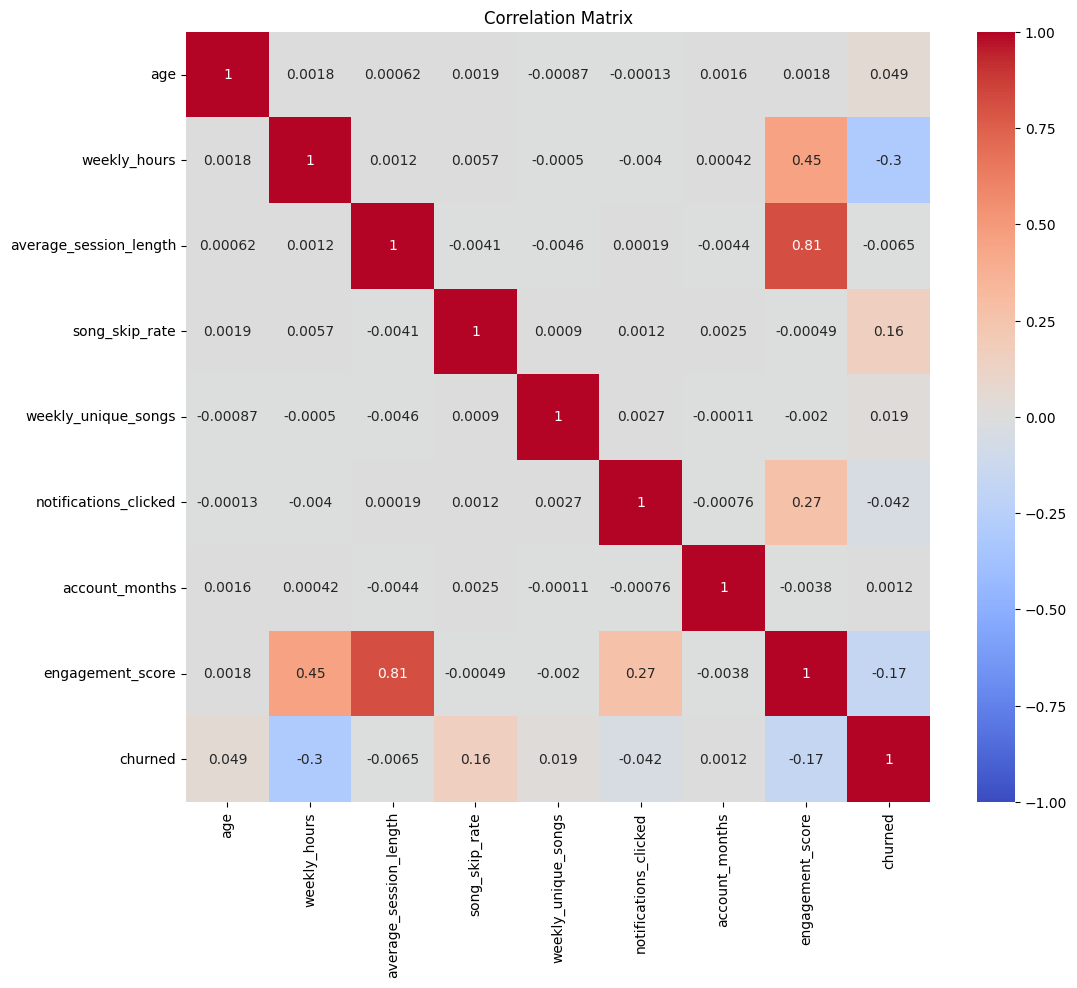

In [ ]:
# Visualizing correlation among numerical features and churned
plt.figure(figsize=(12, 10))
corr = df[num_cols + ['churned']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
